In [ ]:
from pathlib import Path
import numpy as np

dataset = Path(".data/MineRLTreechop-v0")

data = np.load(dataset / "v3_absolute_grape_changeling-7_14600-16079" / "rendered.npz")

print(data)

for key in data.keys():
    print(f"{key}: shape={data[key].shape}, dtype={data[key].dtype}")


In [ ]:
embedding = np.load(dataset / "v3_absolute_grape_changeling-7_14600-16079" / "embedding.npy")

print(f"embedding.shape: {embedding.shape}")
print(embedding[0])


actions = np.load(dataset / "v3_absolute_grape_changeling-7_14600-16079" / "actions.npy")

print(actions)


Loading observations from: ../.data/MineRLTreechop-v0/v3_absolute_grape_changeling-7_14600-16079/recording.mp4

Total observations: 1480 frames
Frame shape: (64, 64, 3) (height, width, channels)
Data type: uint8
Value range: [0, 255]

Available batches: 92 (batch indices: 0 to 91)

Action data available:
  Total steps: 1417
  Actions: ['action$forward', 'action$left', 'action$back', 'action$right', 'action$jump', 'action$sneak', 'action$sprint', 'action$attack', 'action$camera']
  Total reward: 64.00

Batch 69 information:
  Frame range: 1104 to 1119 (inclusive)
  Total frames in batch: 16

Displaying all 16 frames from batch 69:


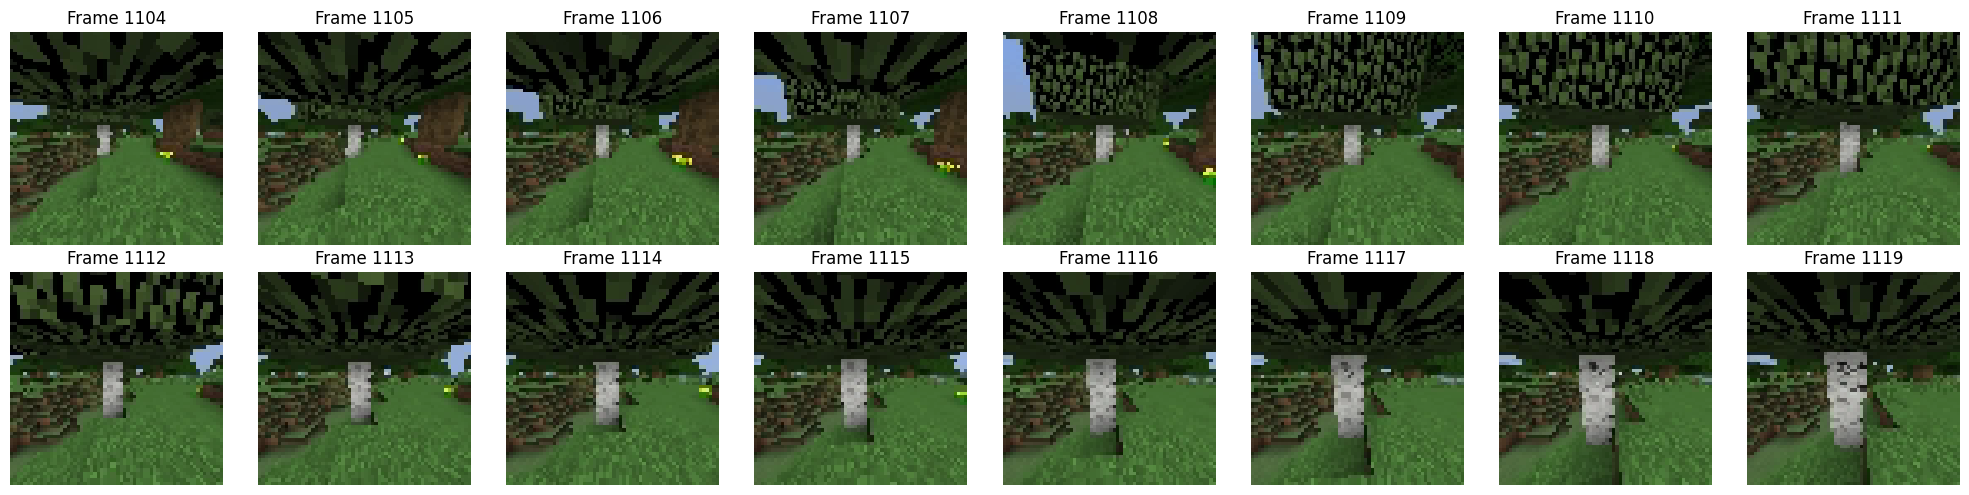


Actions for batch 69 (frames 1104 to 1119):

Frame 1104:
  Actions: attack
  Reward: 0.00

Frame 1105:
  Actions: attack
  Reward: 0.00

Frame 1106:
  Actions: attack
  Reward: 0.00

Frame 1107:
  Actions: attack
  Reward: 0.00

Frame 1108:
  Actions: attack
  Reward: 1.00

Frame 1109:
  Actions: attack
  Reward: 0.00

Frame 1110:
  Actions: attack
  Reward: 0.00

Frame 1111:
  Actions: attack
  Reward: 0.00

Frame 1112:
  Actions: attack
  Reward: 0.00

Frame 1113:
  Actions: attack
  Reward: 0.00

Frame 1114:
  Actions: attack
  Reward: 0.00

Frame 1115:
  Actions: attack
  Reward: 0.00

Frame 1116:
  Actions: attack
  Reward: 0.00

Frame 1117:
  Actions: attack
  Reward: 0.00

Frame 1118:
  Actions: attack
  Reward: 0.00

Frame 1119:
  Actions: attack
  Reward: 0.00


Action summary for batch 69 (frames 1104 to 1119):
Frame    Movement             Attack   Camera                    Reward    
--------------------------------------------------------------------------------
1104     

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

# Configuration: Select episode and batch/chunk to view
episode_name = "v3_absolute_grape_changeling-7_14600-16079"
batch_idx = 69  # Change this to view a different batch (chunk)
batch_size = 16  # Number of frames per batch

# Load observations from the original dataset
dataset = Path("../.data/MineRLTreechop-v0")
episode_dir = dataset / episode_name

# Load video file to extract observations
video_path = episode_dir / "recording.mp4"
rendered_path = episode_dir / "rendered.npz"

if not video_path.exists():
    print(f"Video file not found: {video_path}")
else:
    # Load video frames (observations)
    print(f"Loading observations from: {video_path}\n")
    cap = cv2.VideoCapture(str(video_path))
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)

    cap.release()

    observations = np.array(frames)

    # Load action data for context
    action_data = None
    if rendered_path.exists():
        action_data = np.load(rendered_path)

    print(f"Total observations: {observations.shape[0]} frames")
    print(f"Frame shape: {observations.shape[1:]} (height, width, channels)")
    print(f"Data type: {observations.dtype}")
    print(f"Value range: [{observations.min()}, {observations.max()}]")

    # Calculate available batches
    total_batches = len(observations) // batch_size
    print(f"\nAvailable batches: {total_batches} (batch indices: 0 to {total_batches - 1})")

    if action_data is not None:
        print(f"\nAction data available:")
        print(f"  Total steps: {len(action_data['reward'])}")
        print(f"  Actions: {list([k for k in action_data.keys() if k.startswith('action$')])}")
        print(f"  Total reward: {action_data['reward'].sum():.2f}")

    # Calculate frame range for the selected batch
    start_frame = batch_idx * batch_size
    end_frame = start_frame + batch_size

    if batch_idx >= total_batches:
        print(f"\nError: Batch {batch_idx} is out of range. Available batches: 0 to {total_batches - 1}")
    else:
        # Extract frames for the selected batch
        batch_frames = observations[start_frame:end_frame]

        print(f"\nBatch {batch_idx} information:")
        print(f"  Frame range: {start_frame} to {end_frame - 1} (inclusive)")
        print(f"  Total frames in batch: {len(batch_frames)}")

        # Display all 16 frames from this batch
        print(f"\nDisplaying all {len(batch_frames)} frames from batch {batch_idx}:")
        fig2, axes2 = plt.subplots(2, 8, figsize=(20, 5))
        axes2 = axes2.flatten()

        for i in range(len(batch_frames)):
            axes2[i].imshow(batch_frames[i])
            axes2[i].set_title(f"Frame {start_frame + i}")
            axes2[i].axis('off')

        plt.tight_layout()
        plt.show()

        # Parse and display actions for all frames in this batch
        if action_data is not None:
            print(f"\nActions for batch {batch_idx} (frames {start_frame} to {end_frame - 1}):")
            print("=" * 80)

            # Extract action names (remove 'action$' prefix)
            action_names = [k.replace('action$', '') for k in action_data.keys() if k.startswith('action$')]

            for i, frame_idx in enumerate(range(start_frame, end_frame)):
                if frame_idx >= len(action_data['reward']):
                    break

                print(f"\nFrame {frame_idx}:")

                # Collect active actions
                active_actions = []

                # Movement actions
                if action_data['action$forward'][frame_idx]:
                    active_actions.append("forward")
                if action_data['action$back'][frame_idx]:
                    active_actions.append("back")
                if action_data['action$left'][frame_idx]:
                    active_actions.append("left")
                if action_data['action$right'][frame_idx]:
                    active_actions.append("right")
                if action_data['action$jump'][frame_idx]:
                    active_actions.append("jump")
                if action_data['action$sneak'][frame_idx]:
                    active_actions.append("sneak")
                if action_data['action$sprint'][frame_idx]:
                    active_actions.append("sprint")
                if action_data['action$attack'][frame_idx]:
                    active_actions.append("attack")

                # Camera action
                camera = action_data['action$camera'][frame_idx]
                if abs(camera[0]) > 0.1 or abs(camera[1]) > 0.1:
                    active_actions.append(f"camera({camera[0]:.2f}, {camera[1]:.2f})")

                # Reward
                reward = action_data['reward'][frame_idx]

                # Display
                if active_actions:
                    print(f"  Actions: {', '.join(active_actions)}")
                else:
                    print(f"  Actions: idle")
                print(f"  Reward: {reward:.2f}")

            print("\n" + "=" * 80)

            # Summary table
            print(f"\nAction summary for batch {batch_idx} (frames {start_frame} to {end_frame - 1}):")
            print(f"{'Frame':<8} {'Movement':<20} {'Attack':<8} {'Camera':<25} {'Reward':<10}")
            print("-" * 80)

            for frame_idx in range(start_frame, end_frame):
                if frame_idx >= len(action_data['reward']):
                    break

                movement = []
                if action_data['action$forward'][frame_idx]:
                    movement.append("F")
                if action_data['action$back'][frame_idx]:
                    movement.append("B")
                if action_data['action$left'][frame_idx]:
                    movement.append("L")
                if action_data['action$right'][frame_idx]:
                    movement.append("R")
                if action_data['action$jump'][frame_idx]:
                    movement.append("J")
                if action_data['action$sneak'][frame_idx]:
                    movement.append("Sn")
                if action_data['action$sprint'][frame_idx]:
                    movement.append("Sp")

                movement_str = "+".join(movement) if movement else "idle"
                attack = "✓" if action_data['action$attack'][frame_idx] else "-"

                camera = action_data['action$camera'][frame_idx]
                if abs(camera[0]) > 0.1 or abs(camera[1]) > 0.1:
                    camera_str = f"({camera[0]:.1f}, {camera[1]:.1f})"
                else:
                    camera_str = "-"

                reward = action_data['reward'][frame_idx]

                print(f"{frame_idx:<8} {movement_str:<20} {attack:<8} {camera_str:<25} {reward:<10.2f}")